In [2]:
# %load /home/sjkim/.jupyter/head.py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

# seaborn
#import seaborn as sns
#sns.set( style = 'white', font_scale = 1.7)
#sns.set_style('ticks')
#plt.rcParams['savefig.dpi'] = 200

# font for matplotlib
#import matplotlib
#import matplotlib.font_manager as fm
#fm.get_fontconfig_fonts()
#font_location = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
#font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4003 - accuracy: 0.8876 - val_loss: 0.2196 - val_accuracy: 0.9379
Epoch 2/5
48000/48000 [==============================] - 1s 26us/sample - loss: 0.1955 - accuracy: 0.9441 - val_loss: 0.1701 - val_accuracy: 0.9514
Epoch 3/5
48000/48000 [==============================] - 1s 26us/sample - loss: 0.1425 - accuracy: 0.9591 - val_loss: 0.1374 - val_accuracy: 0.9615
Epoch 4/5
48000/48000 [==============================] - 1s 26us/sample - loss: 0.1121 - accuracy: 0.9680 - val_loss: 0.1201 - val_accuracy: 0.9665
Epoch 5/5
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0908 - accuracy: 0.9737 - val_loss: 0.1148 - val_accuracy: 0.9663
Test Loss and Accuracy -> [0.10591330759692937, 0.968]


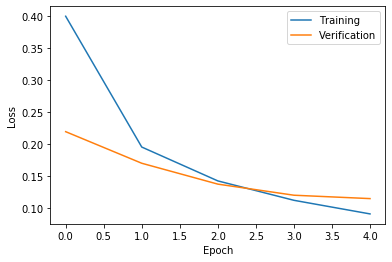

KeyError: 'acc'

In [5]:
##############################################
# Modeling
##############################################
from tensorflow.keras import layers, models


def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])


class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])


##############################################
# Data
##############################################
import numpy as np
from tensorflow.keras import datasets  # mnist
from tensorflow.keras import utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


##############################################
# Main
##############################################
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

# model = ANN_models_func(Nin, Nh, Nout)
# model = ANN_models_class(Nin, Nh, Nout)
model = ANN_seq_class(Nin, Nh, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

##############################################
# Training
##############################################
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, Y_test, batch_size=100, verbose=0)
print('Test Loss and Accuracy ->', performace_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [6]:
history.history

{'loss': [0.4003097590679924,
  0.19549533459357918,
  0.14247472278463344,
  0.11210345297198122,
  0.09079742446386566],
 'accuracy': [0.887625, 0.9440625, 0.95914584, 0.968, 0.97366667],
 'val_loss': [0.21957289854375026,
  0.170119190774858,
  0.13743917026246588,
  0.12007358745128537,
  0.11477515500737354],
 'val_accuracy': [0.9379167, 0.9514167, 0.9615, 0.9665, 0.9663333]}